In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.eq(0).sum()

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Cabin            0
Embarked         0
dtype: int64

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.corr

<bound method DataFrame.corr of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

<AxesSubplot:>

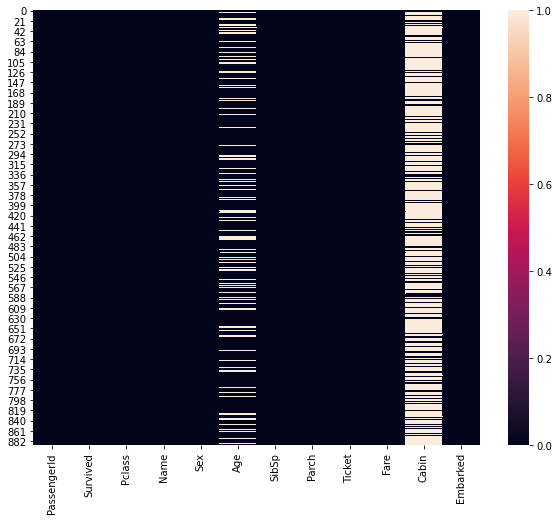

In [8]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.isnull())

In [9]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
df['Age'].mean()

29.69911764705882

In [11]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

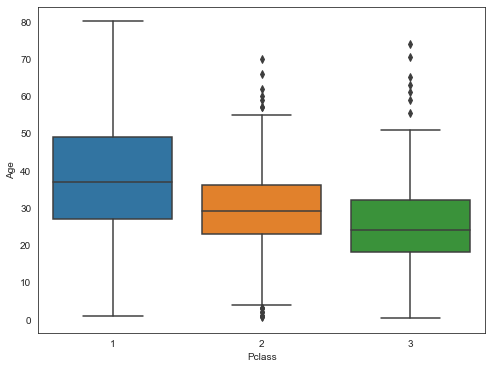

In [12]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.boxplot(x='Pclass', y='Age', data=df)

In [13]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [14]:
def updateAge(cols):
    age = cols[1]
    pclass = cols[0]
    
    if (pd.isnull(age)):
        if pclass == 1:
            return 40
        elif pclass == 2:
            return  35
        else:
            return 25
        
    else:
        return age

In [15]:
df['Age'] = df[['Age', 'Pclass']].apply(updateAge, axis=1)

In [16]:
df.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

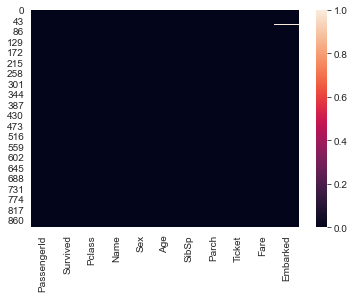

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.dropna(inplace=True)

<AxesSubplot:>

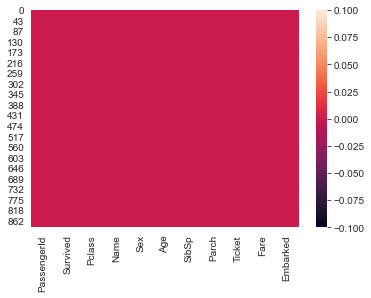

In [19]:
sns.heatmap(df.isnull())


In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,3.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,S


In [21]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,-0.035330,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.335549,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,1.000000,0.081656,0.016824,-0.548193
Age,-0.035330,-0.335549,1.000000,1.000000,0.081656,0.016824,-0.548193
SibSp,-0.057686,-0.034040,0.081656,0.081656,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,0.016824,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,-0.548193,0.160887,0.217532,1.000000


<AxesSubplot:>

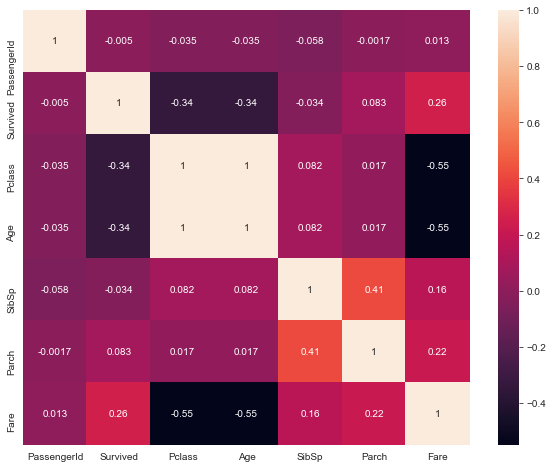

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [23]:
df.drop(['PassengerId','Name', 'Ticket'], axis=1, inplace=True)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,3.0,1,0,7.2500,S
1,1,1,female,1.0,1,0,71.2833,C
2,1,3,female,3.0,0,0,7.9250,S
3,1,1,female,1.0,1,0,53.1000,S
4,0,3,male,3.0,0,0,8.0500,S


In [25]:
df['Sex'].unique()


array(['male', 'female'], dtype=object)

In [26]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [27]:
sex = pd.get_dummies(df['Sex'], drop_first=True)


In [28]:
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,3.0,1,0,7.2500,S
1,1,1,female,1.0,1,0,71.2833,C
2,1,3,female,3.0,0,0,7.9250,S
3,1,1,female,1.0,1,0,53.1000,S
4,0,3,male,3.0,0,0,8.0500,S


In [30]:
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)


In [31]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,3.0,1,0,7.2500
1,1,1,1.0,1,0,71.2833
2,1,3,3.0,0,0,7.9250
3,1,1,1.0,1,0,53.1000
4,0,3,3.0,0,0,8.0500


In [32]:
df = pd.concat([df, sex, embarked], axis=1)

In [33]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,3.0,1,0,7.2500,1,0,1
1,1,1,1.0,1,0,71.2833,0,0,0
2,1,3,3.0,0,0,7.9250,0,0,1
3,1,1,1.0,1,0,53.1000,0,0,1
4,0,3,3.0,0,0,8.0500,1,0,1


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.33)

In [36]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,3.0,1,0,7.2500,1,0,1
1,1,1,1.0,1,0,71.2833,0,0,0
2,1,3,3.0,0,0,7.9250,0,0,1
3,1,1,1.0,1,0,53.1000,0,0,1
4,0,3,3.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,2.0,0,0,13.0000,1,0,1
887,1,1,1.0,0,0,30.0000,0,0,1
888,0,3,3.0,1,2,23.4500,0,0,1
889,1,1,1.0,0,0,30.0000,1,0,0


In [37]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
494,3,3.0,0,0,8.0500,1,0,1
594,2,2.0,1,0,26.0000,1,0,1
585,1,1.0,0,2,79.6500,0,0,1
673,2,2.0,0,0,13.0000,1,0,1
751,3,3.0,0,1,12.4750,1,0,1
...,...,...,...,...,...,...,...,...
526,2,2.0,0,0,10.5000,0,0,1
34,1,1.0,1,0,82.1708,1,0,0
652,3,3.0,0,0,8.4333,1,0,1
631,3,3.0,0,0,7.0542,1,0,1


In [38]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
225,3,3.0,0,0,9.3500,1,0,1
62,1,1.0,1,0,83.4750,1,0,1
160,3,3.0,0,1,16.1000,1,0,1
836,3,3.0,0,0,8.6625,1,0,1
667,3,3.0,0,0,7.7750,1,0,1
...,...,...,...,...,...,...,...,...
218,1,1.0,0,0,76.2917,0,0,0
100,3,3.0,0,0,7.8958,0,0,1
813,3,3.0,4,2,31.2750,0,0,1
391,3,3.0,0,0,7.7958,1,0,1


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()


In [41]:
lr.fit(X_train, y_train)

LogisticRegression()

In [42]:
X_test.iloc[0]

Pclass    3.00
Age       3.00
SibSp     0.00
Parch     0.00
Fare      9.35
male      1.00
Q         0.00
S         1.00
Name: 225, dtype: float64

In [43]:
lr.predict([[1.0, 47.0, 0.0, 0.0, 38.5, 1.0, 0.0, 1.0]])

array([0], dtype=int64)

In [44]:
lr.predict_proba([[1.0, 47.0, 0.0, 0.0, 38.5, 1.0, 0.0, 1.0]])


array([[9.99999997e-01, 2.57648002e-09]])

In [45]:
predictions = lr.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [46]:
from sklearn import metrics

In [47]:
metrics.confusion_matrix(y_test, predictions)

array([[149,  33],
       [ 37,  75]], dtype=int64)

In [48]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       182
           1       0.69      0.67      0.68       112

    accuracy                           0.76       294
   macro avg       0.75      0.74      0.75       294
weighted avg       0.76      0.76      0.76       294



In [49]:
import pickle

In [51]:
pickle.dump(lr,open("titanic.pkl","wb"))

In [55]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,3.0,1,0,7.2500,1,0,1
1,1,1,1.0,1,0,71.2833,0,0,0
2,1,3,3.0,0,0,7.9250,0,0,1
3,1,1,1.0,1,0,53.1000,0,0,1
4,0,3,3.0,0,0,8.0500,1,0,1


In [54]:
MyModel = pickle.load(open("titanic.pkl","rb"))

In [64]:
MyModel.predict([[1,25,1,0,10,1,0,0]])[0]

0

In [65]:
MyModel.predict([[5,50,1,0,10,1,0,0]])

array([0], dtype=int64)